In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

In [5]:
seq_in = np.array([.1, .2 , .3, .4, .5, .6, .7, .8, .9])
print(seq_in)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [6]:
n_in = len(seq_in)
print(n_in)

samples = 1 # batch_size
features = 1 # n_input
hidden_layer = 100
epochs = 300

9


In [7]:
seq_in = seq_in.reshape(samples, n_in, features)
print("seq_in=\n", seq_in)

seq_out = seq_in[:, 1:, :]
print("seq_out=\n", seq_out)

n_out = n_in - 1

seq_in=
 [[[0.1]
  [0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]
seq_out=
 [[[0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]


In [8]:
model = Sequential()
model.add(LSTM(hidden_layer, activation='relu', input_shape=(n_in, features)))
model.add(RepeatVector(n_out))
model.add(LSTM(hidden_layer, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))

In [11]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(seq_in, seq_out, epochs=epochs, verbose=0)

result = model.evaluate(seq_in, seq_out)
print("\nTraining accuracy:", result[1])

1/1 [==============================] - 0s 184ms/step

Training accuracy: 0.0


In [12]:
yhat = model.predict(seq_in, verbose=0)
print(yhat)

[[[0.19520575]
  [0.30171463]
  [0.40304622]
  [0.5018104 ]
  [0.5994805 ]
  [0.69757557]
  [0.7977982 ]
  [0.9021864 ]]]


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 8, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8, 100)            80400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 8, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


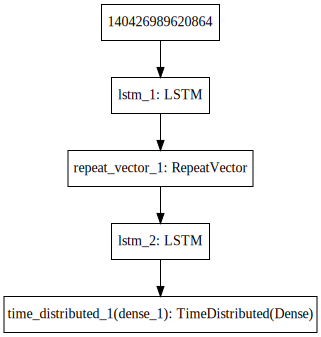

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))